# SALE PRICE FORECASTING - WORK IN PROGRESS....

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Import Dependencies </b></div>


In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm, skew 
import matplotlib.lines as mlines
pd.pandas.set_option('display.max_rows',None)
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
fig_size = [12, 6]

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Assemble Datasets </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black">  • Load All Datasets </span> 

In [243]:
path_oil = '../dataset/oil.csv'
path_holidays = '../dataset/holidays_events.csv'
path_stores = '../dataset/stores.csv'
path_train = '../dataset/train.csv'
path_transactions = '../dataset/transactions.csv'
path_test = '../dataset/test.csv'

df_oil = pd.read_csv(path_oil, parse_dates=['date'], index_col='date')
df_holidays = pd.read_csv(path_holidays, parse_dates=['date'], index_col='date')
df_stores = pd.read_csv(path_stores)
df_train = pd.read_csv(path_train, parse_dates=['date'], index_col='date')
df_transactions = pd.read_csv(path_transactions, parse_dates=['date'], index_col='date')
df_test = pd.read_csv(path_test, parse_dates=['date'], index_col='date')


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black">  • Dataset Dictionary </span> 

In [244]:
dfs = {
    "Training":df_train,
    "Holiday Events": df_holidays,
    "Oil": df_oil,
    "Stores": df_stores,
    "Transactions": df_transactions
}

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black">  • Explode the date index into separate columns for day, month, and year </span> 

In [245]:
for name, df in dfs.items():
    try:
        df['day'] = df.index.day
        df['month'] = df.index.month
        df['year'] = df.index.year
        
    except Exception as exc:
        print(f'{name} dataset does not conatin date index. {exc}')

    finally:
        print(f'Columns successfully added for {name}')


Columns successfully added for Training
Columns successfully added for Holiday Events
Columns successfully added for Oil
Stores dataset does not conatin date index. 'RangeIndex' object has no attribute 'day'
Columns successfully added for Stores
Columns successfully added for Transactions


<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Dataframe Analysis </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 17px; text-shadow: 0.5px 0.5px black"> 
This section focuses on baseline dataframe characteristics for all the datasets.
</span> 

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Dataframe Shapes:
</span> 

In [246]:
for name, df in dfs.items():
    print(f'Shape of the {name} dataset {df.shape}')
    

Shape of the Training dataset (3000888, 8)
Shape of the Holiday Events dataset (350, 8)
Shape of the Oil dataset (1218, 4)
Shape of the Stores dataset (54, 5)
Shape of the Transactions dataset (83488, 5)


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Dataset Informations:
</span> 

In [247]:
for name, df in dfs.items():
    print(f'>> {name}')
    df.info()
    print('-'*25)
    

>> Training
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   day          int32  
 6   month        int32  
 7   year         int32  
dtypes: float64(1), int32(3), int64(3), object(1)
memory usage: 171.7+ MB
-------------------------
>> Holiday Events
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 350 entries, 2012-03-02 to 2017-12-26
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         350 non-null    object
 1   locale       350 non-null    object
 2   locale_name  350 non-null    object
 3   description  350 non-null    object
 4   transferred  350 non-null    bool  
 5   day          350 non-null    int32 
 6   month        350 non-null  

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Dataset Descriptions:
</span> 

In [248]:
for name, df in dfs.items():
    print(f'>> {name}:\n{df.describe()}')
    print('-'*25)
    

>> Training:
                 id     store_nbr         sales   onpromotion           day  \
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06   
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00  1.563005e+01   
std    8.662819e+05  1.558579e+01  1.101998e+03  1.221888e+01  8.794789e+00   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    7.502218e+05  1.400000e+01  0.000000e+00  0.000000e+00  8.000000e+00   
50%    1.500444e+06  2.750000e+01  1.100000e+01  0.000000e+00  1.600000e+01   
75%    2.250665e+06  4.100000e+01  1.958473e+02  0.000000e+00  2.300000e+01   
max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02  3.100000e+01   

              month          year  
count  3.000888e+06  3.000888e+06  
mean   6.207838e+00  2.014838e+03  
std    3.385668e+00  1.345518e+00  
min    1.000000e+00  2.013000e+03  
25%    3.000000e+00  2.014000e+03  
50%    6.000000e+00  2.015000e+03  
75%    9.000000e+00  2.

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Null Inspections:
</span> 

In [249]:
for name, df in dfs.items():
    print(f"Missing values in {name} dataset:")
    print(df.isnull().sum())
    print('-'*25)
    

Missing values in Training dataset:
id             0
store_nbr      0
family         0
sales          0
onpromotion    0
day            0
month          0
year           0
dtype: int64
-------------------------
Missing values in Holiday Events dataset:
type           0
locale         0
locale_name    0
description    0
transferred    0
day            0
month          0
year           0
dtype: int64
-------------------------
Missing values in Oil dataset:
dcoilwtico    43
day            0
month          0
year           0
dtype: int64
-------------------------
Missing values in Stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64
-------------------------
Missing values in Transactions dataset:
store_nbr       0
transactions    0
day             0
month           0
year            0
dtype: int64
-------------------------


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Duplicated Entries:
</span> 

In [250]:
for name, df in dfs.items():
    print(f"Duplicated entries for {name} dataset:")
    print(df.duplicated().sum())
    print('-'*25)


Duplicated entries for Training dataset:
0
-------------------------
Duplicated entries for Holiday Events dataset:
0
-------------------------
Duplicated entries for Oil dataset:
0
-------------------------
Duplicated entries for Stores dataset:
0
-------------------------
Duplicated entries for Transactions dataset:
0
-------------------------


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Skewness:
</span> 

In [251]:
for name, df in dfs.items():
    df_num = df.select_dtypes(include=np.number)
    print(f'>> Skewness for the numerical variable of the {name} dataset:\n{df_num.skew()}\n')
    print('-'*25)


>> Skewness for the numerical variable of the Training dataset:
id            -9.492127e-16
store_nbr      0.000000e+00
sales          7.358758e+00
onpromotion    1.116656e+01
day            2.374403e-02
month          1.128158e-01
year           9.626854e-02
dtype: float64

-------------------------
>> Skewness for the numerical variable of the Holiday Events dataset:
day      0.06333
month   -0.09426
year    -0.19479
dtype: float64

-------------------------
>> Skewness for the numerical variable of the Oil dataset:
dcoilwtico    0.321648
day           0.007013
month         0.097233
year          0.087949
dtype: float64

-------------------------
>> Skewness for the numerical variable of the Stores dataset:
store_nbr    0.000000
cluster      0.041241
dtype: float64

-------------------------
>> Skewness for the numerical variable of the Transactions dataset:
store_nbr       0.003456
transactions    1.518351
day             0.021466
month           0.107987
year            0.027812
d

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Kurtosis:
</span>

In [252]:
for name, df in dfs.items():
    df_num = df.select_dtypes(include=np.number)
    print(f'>> Kurtosis for the numerical variable of the {name} dataset:\n{df_num.kurt()}\n')
    print('-'*25)


>> Kurtosis for the numerical variable of the Training dataset:
id              -1.200000
store_nbr       -1.200823
sales          154.562092
onpromotion    240.871122
day             -1.190669
month           -1.141133
year            -1.195638
dtype: float64

-------------------------
>> Kurtosis for the numerical variable of the Holiday Events dataset:
day     -1.426629
month   -1.268932
year    -1.151970
dtype: float64

-------------------------
>> Kurtosis for the numerical variable of the Oil dataset:
dcoilwtico   -1.612437
day          -1.194407
month        -1.136915
year         -1.208924
dtype: float64

-------------------------
>> Kurtosis for the numerical variable of the Stores dataset:
store_nbr   -1.200000
cluster     -1.260918
dtype: float64

-------------------------
>> Kurtosis for the numerical variable of the Transactions dataset:
store_nbr      -1.235213
transactions    2.567213
day            -1.188409
month          -1.136218
year           -1.199858
dtype: float

<a id="A"></a>
# <div style="text-align:left; border-radius:10px 50px; padding:15px; color:white; margin:0; font-size:95%; font-family:Pacifico; background-color:indigo; overflow:hidden"><b> • Exploratory Data Analysis </b></div>


<span style="font-family:Cambria; color:#0261ab; font-size: 17px; text-shadow: 0.5px 0.5px black"> 
This section focuses on exploring features by utilizing visualizations.
</span>

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Sales & Promotion Distribution:
</span> 

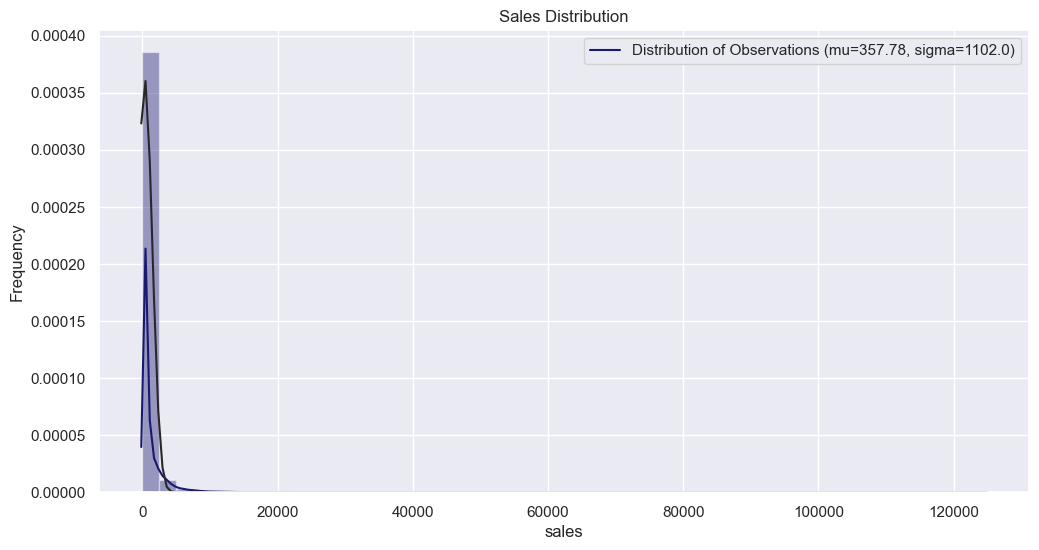

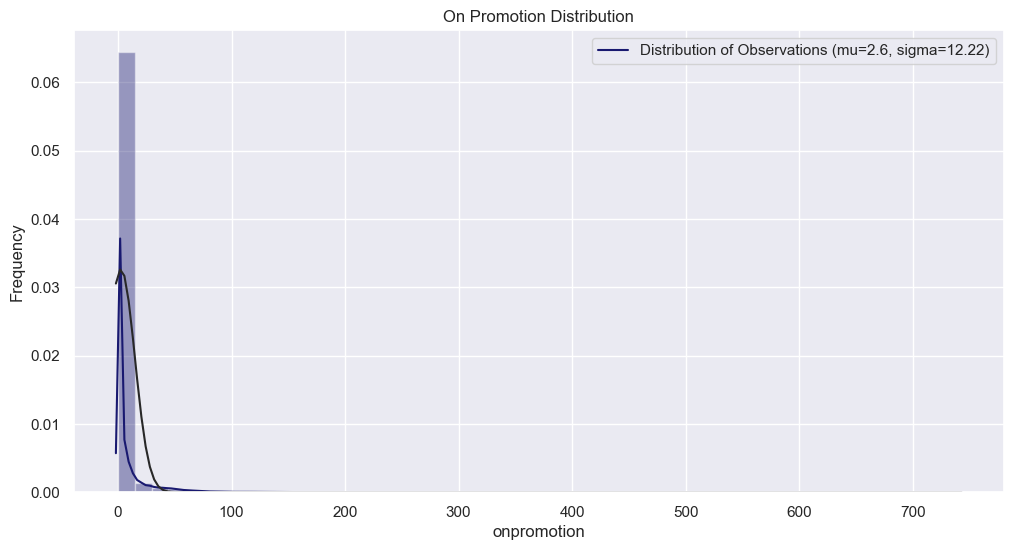

In [253]:
def distplot_feature(target, col):
    sns.set(rc={'figure.figsize':fig_size})        
    sns.distplot(target, fit=norm, color='midnightblue')  
    mu, sigma = norm.fit(target)
    
    plt.legend([f'Distribution of Observations (mu={round(mu,2)}, sigma={round(sigma, 2)})'], loc='upper right')
    plt.ylabel('Frequency')      
    plt.title(f'{col} Distribution', fontsize=12)
    plt.show()

distplot_feature(df_train.sales, 'Sales')
distplot_feature(df_train.onpromotion, 'On Promotion')

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Sale Distribution over the course of Time:
</span> 

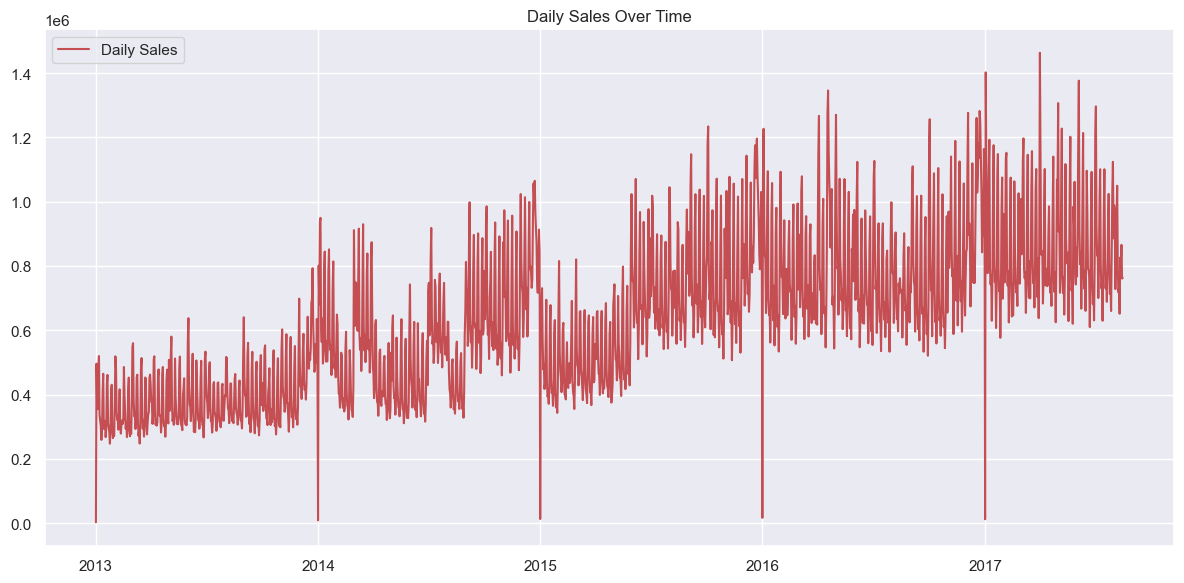

In [254]:
def sales_time(df):
    plt.figure(figsize=(fig_size))
    plt.plot(df.index, df.values, label='Daily Sales', color='r')
    
    plt.title('Daily Sales Over Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

daily_sales = df_train.groupby('date')['sales'].sum()
sales_time(daily_sales)

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Yearly Graph of Daily Sales:
</span> 

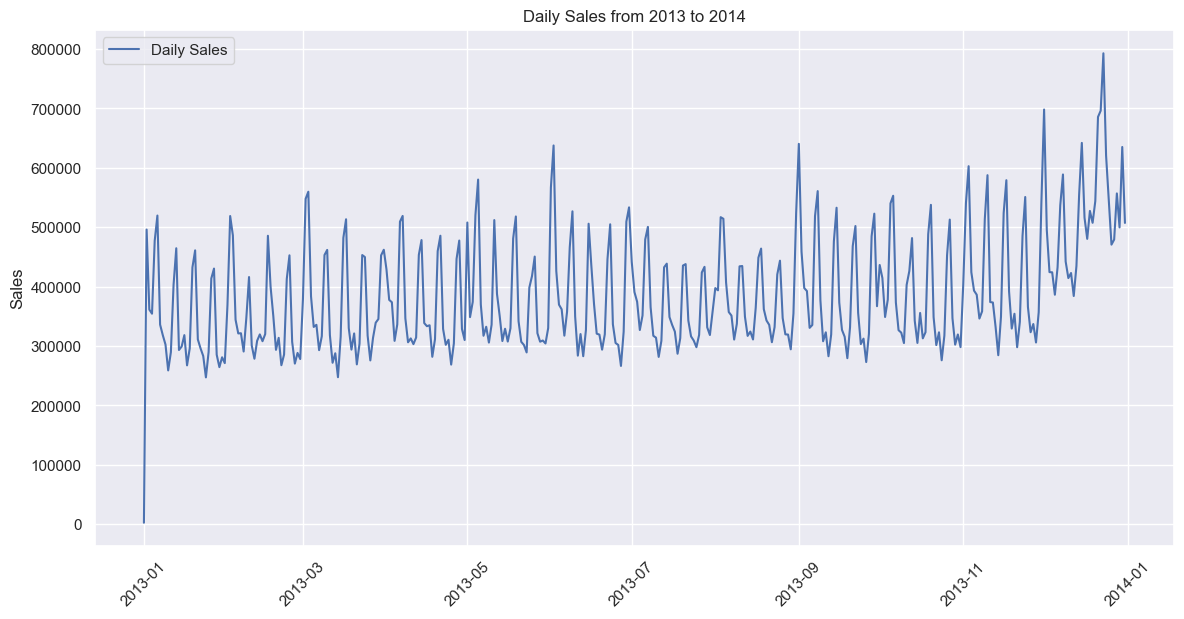

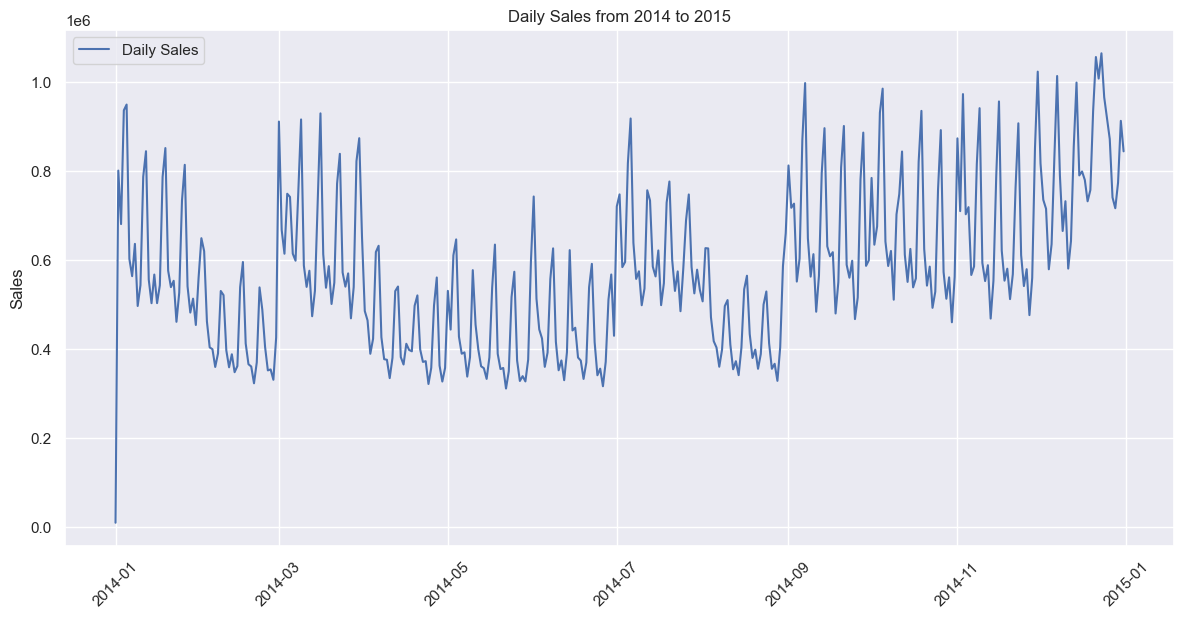

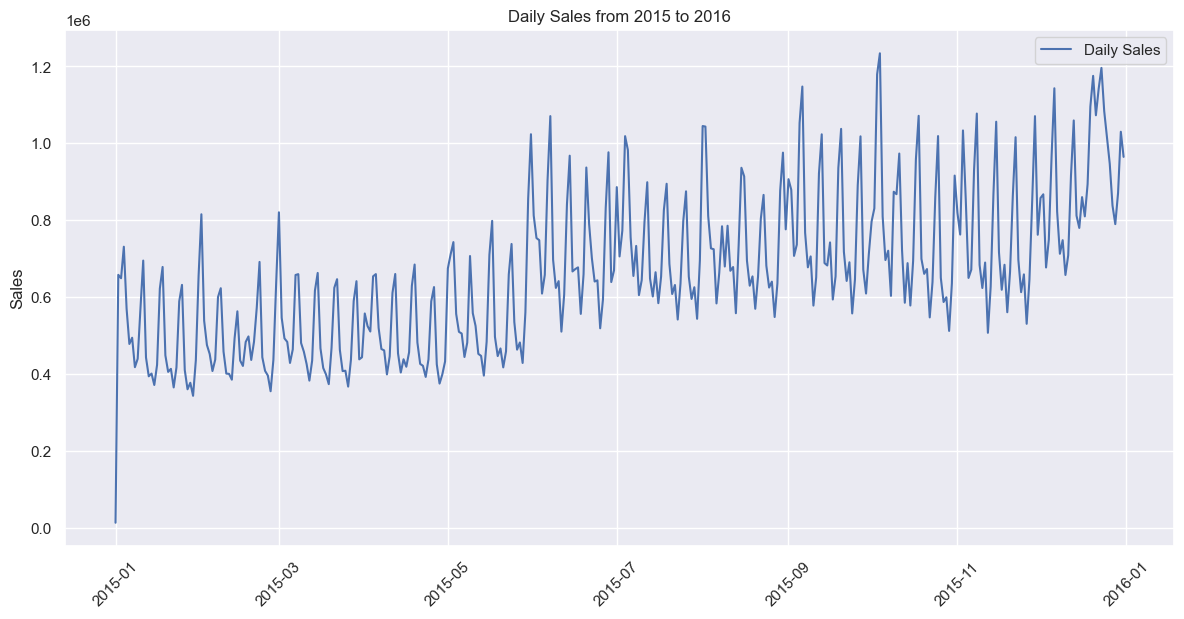

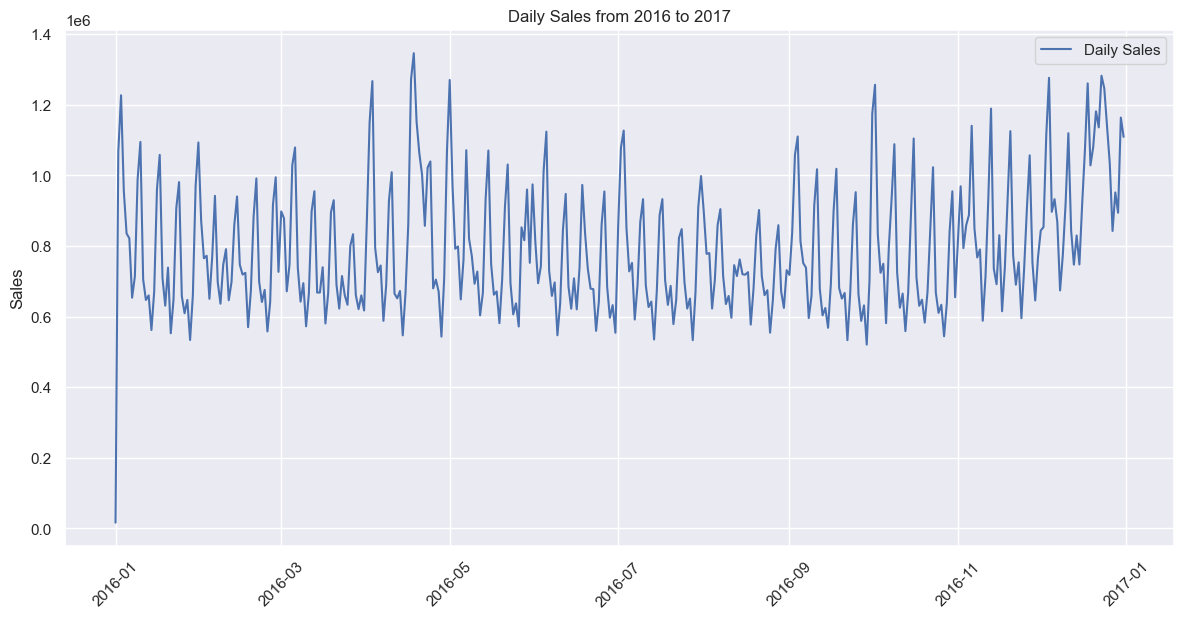

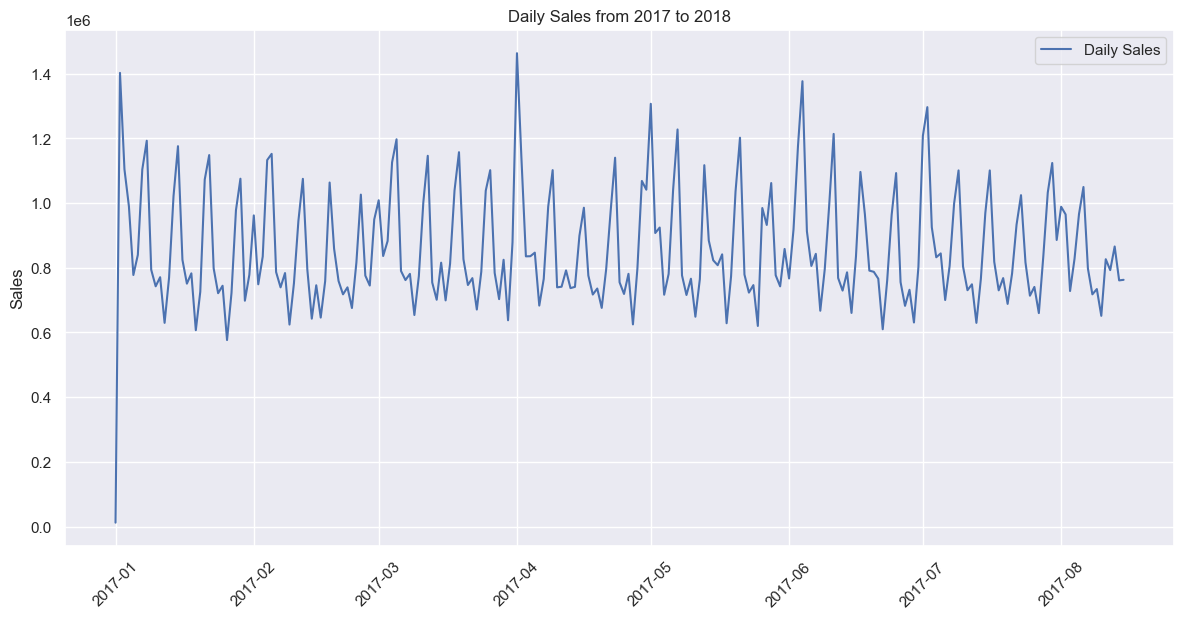

In [255]:
def filter_yearly_graph(df, year_start, year_end):
    plt.figure(figsize=(fig_size))
    plt.plot(df.index, df.values, label='Daily Sales', color='b')
    
    plt.title(f'Daily Sales from {year_start} to {year_end}')
    plt.ylabel('Sales')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

timeframe = df_train.year.unique()

for year in timeframe:
    mask = (daily_sales.index.year >= year) & (daily_sales.index.year < year+1)
    filtered_daily_sales = daily_sales[mask]    
    
    filter_yearly_graph(filtered_daily_sales, year, year+1)


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Yearly Growth of Product Families:
</span> 

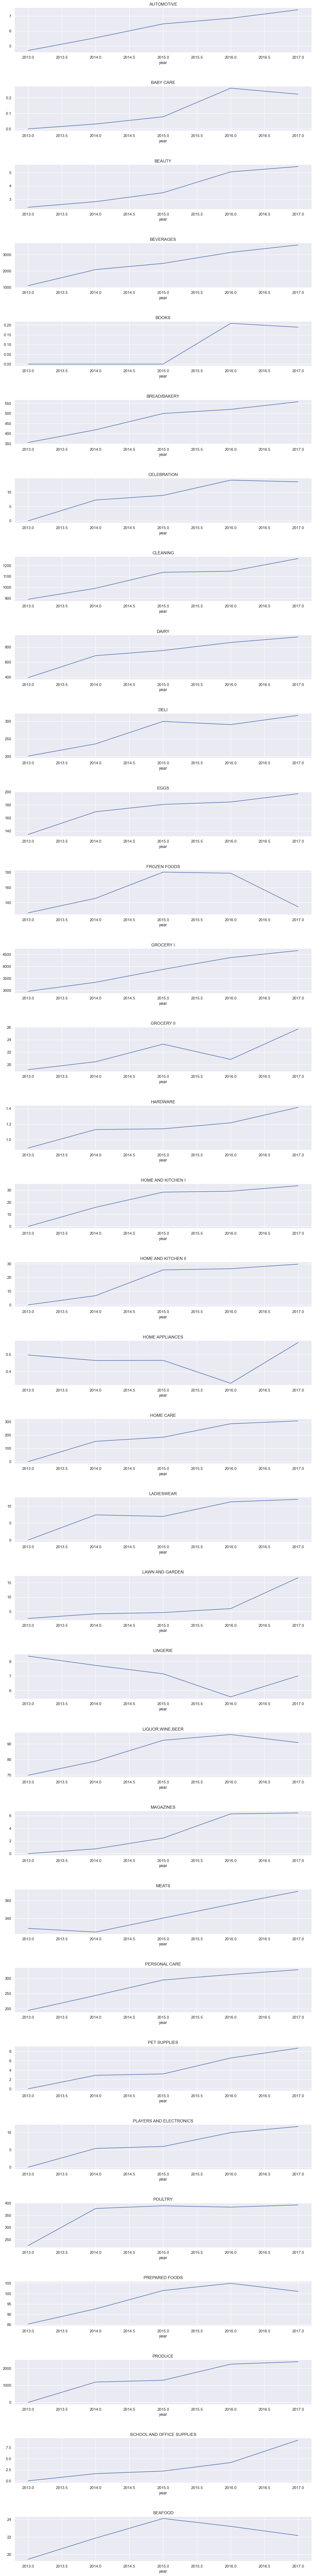

In [256]:
def family_growth(df, family):
    fig= plt.figure(figsize=(15, 130))
    fig.subplots_adjust(hspace=0.75)
    
    for i, product in enumerate(family):
        ax = fig.add_subplot(33, 1, i+1)
        df.query('family==@product').groupby(['year']).sales.mean().plot()
        plt.title(product)

family = df_train.family.unique()
family_growth(df_train, family)
    

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Store Growth on a Monthly basis:
</span> <br>
<span style="font-family:Cambria; color:#0261ab; font-size: 17px; text-shadow: 0.5px 0.5px black"> 
- Store #44 experienced a major boom in July. Additionally, secondary growth includes in January, March, and December
</span> <br>
<span style="font-family:Cambria; color:#0261ab; font-size: 17px; text-shadow: 0.5px 0.5px black"> 
- Store #3 also experienced a minor growth in July.
</span> <br>
<span style="font-family:Cambria; color:#0261ab; font-size: 17px; text-shadow: 0.5px 0.5px black"> 
- Store #52 suffered lack of sales but saw a slight improvement in May, June, and July on aggregate.
</span> <br>

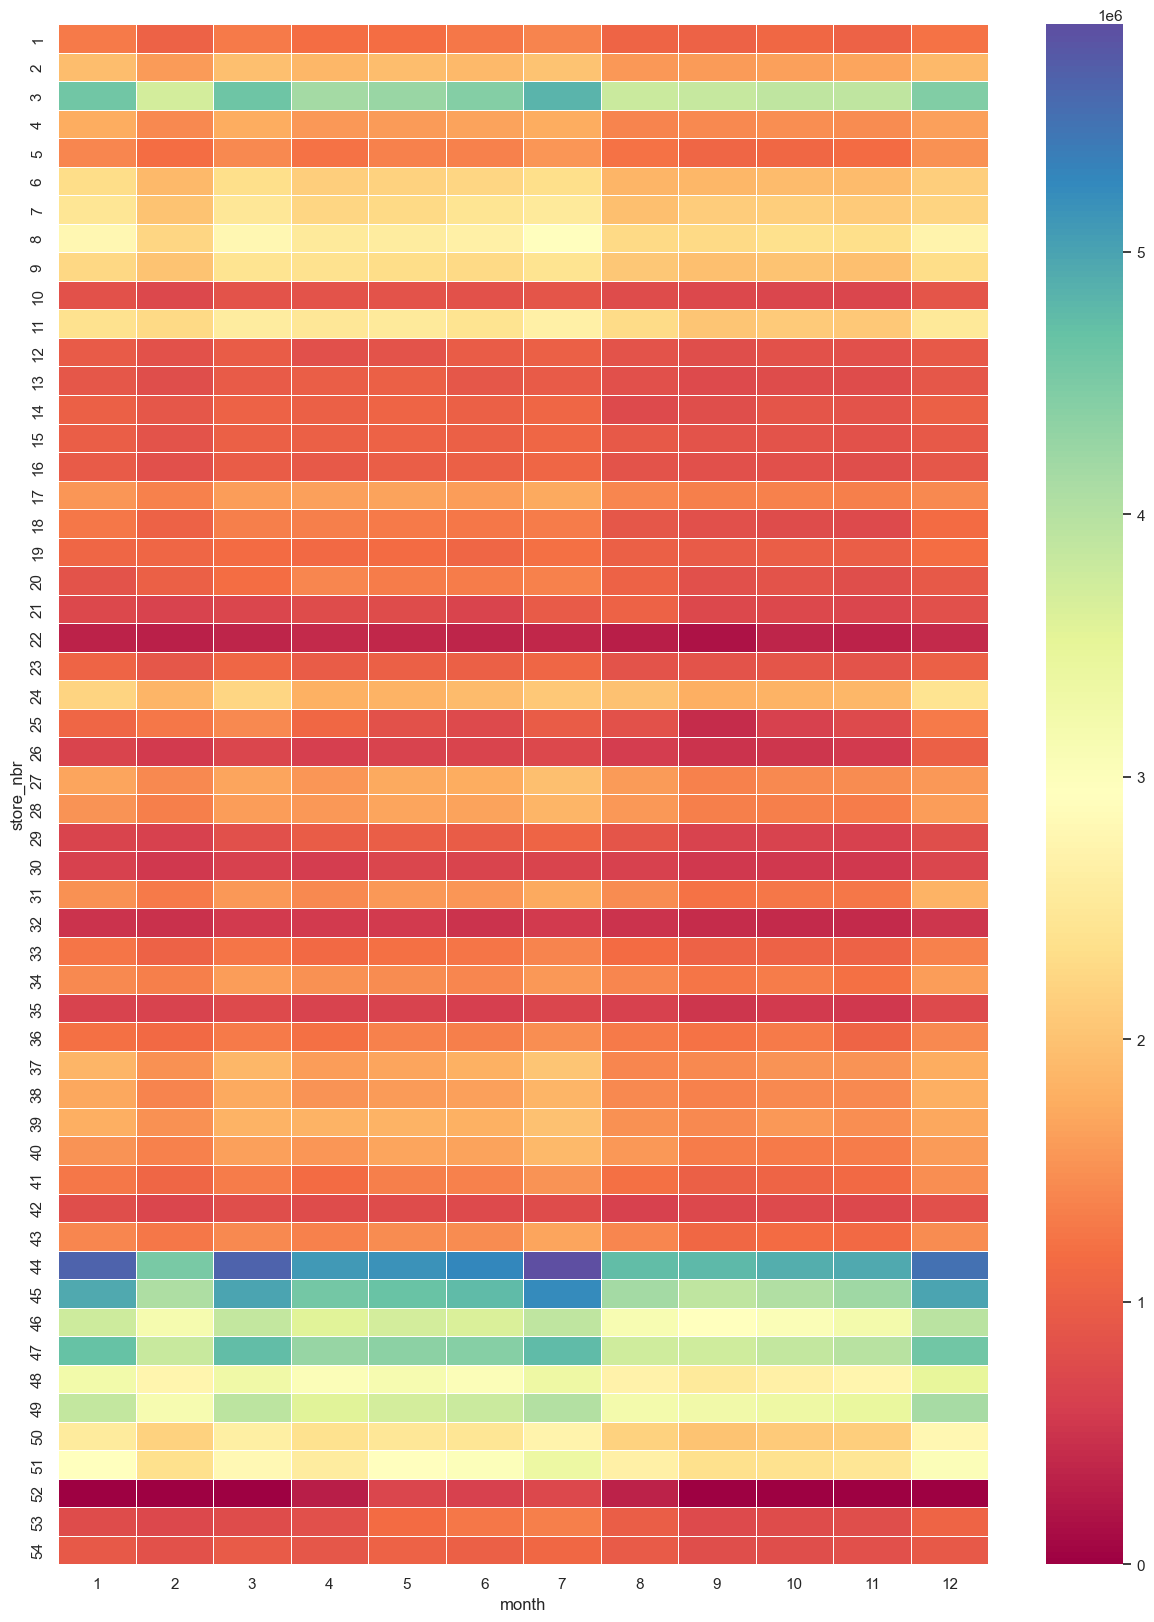

In [257]:
def store_growth(df):
    table = pd.pivot_table(df, values ='sales', index =['store_nbr'], columns =['month'], aggfunc = np.sum)
    fig, ax = plt.subplots(figsize=(15,20))         
    sns.heatmap(table, annot=False, linewidths=.5, ax=ax, cmap="Spectral")
    plt.show()

store_growth(df_train)

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Average Daily Sales per Month:
</span> 

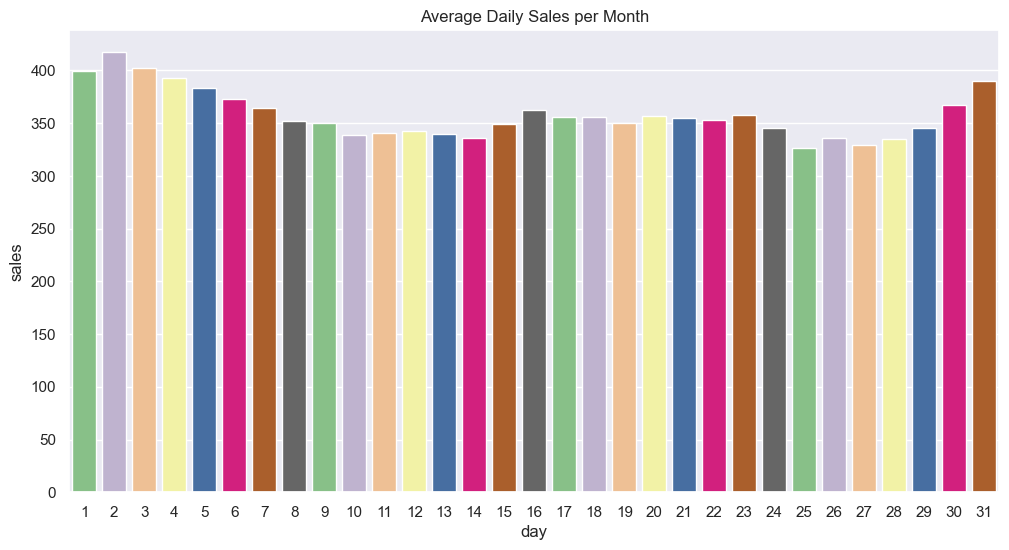

In [258]:
def avg_sales_month(df):
    sns.set(rc={'figure.figsize':fig_size}) 
    sns.barplot(df, palette="Accent")
    plt.title('Average Daily Sales per Month')
    plt.show()

avg_sales_month(df_train.groupby('day').sales.mean())

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Top 10 Stores by Sales and Promotions:
</span> 

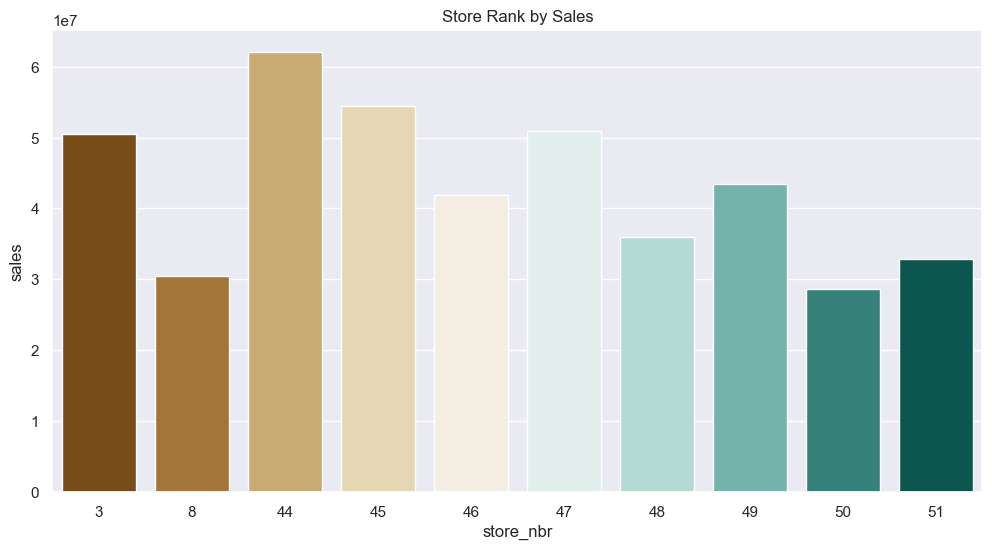

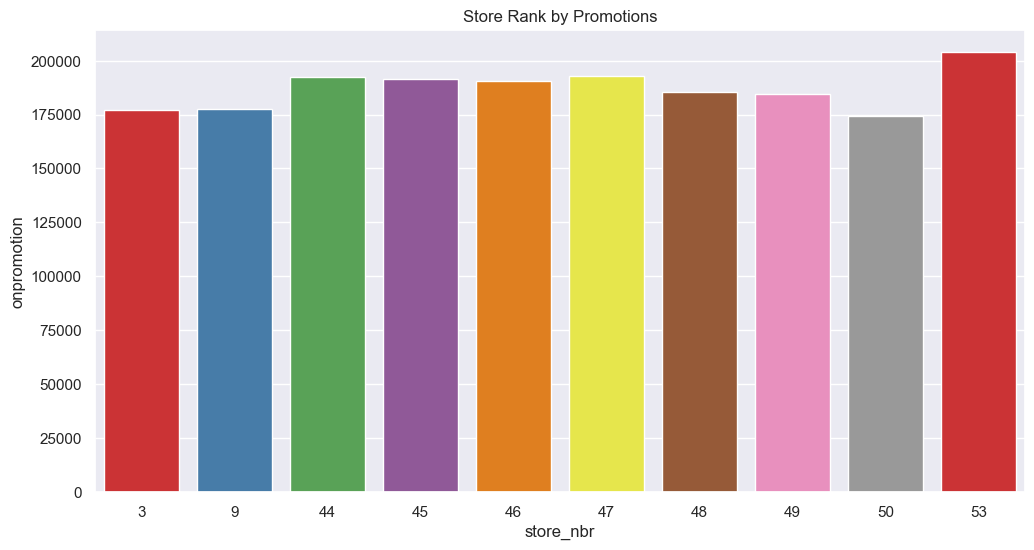

In [259]:
def store_rank(df, title, palette):
    sns.set(rc={'figure.figsize':fig_size}) 
    sns.barplot(df, palette=palette)
    plt.title(title)
    plt.show()

top_stores = df_train.groupby('store_nbr').sales.sum().sort_values(ascending=False).iloc[0:10]
top_promotion = df_train.groupby('store_nbr').onpromotion.sum().sort_values(ascending=False).iloc[0:10]

store_rank(top_stores, 'Store Rank by Sales', "BrBG")
store_rank(top_promotion, 'Store Rank by Promotions', "Set1")


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Promotions on a Monthly and Yearly Basis:
</span> 

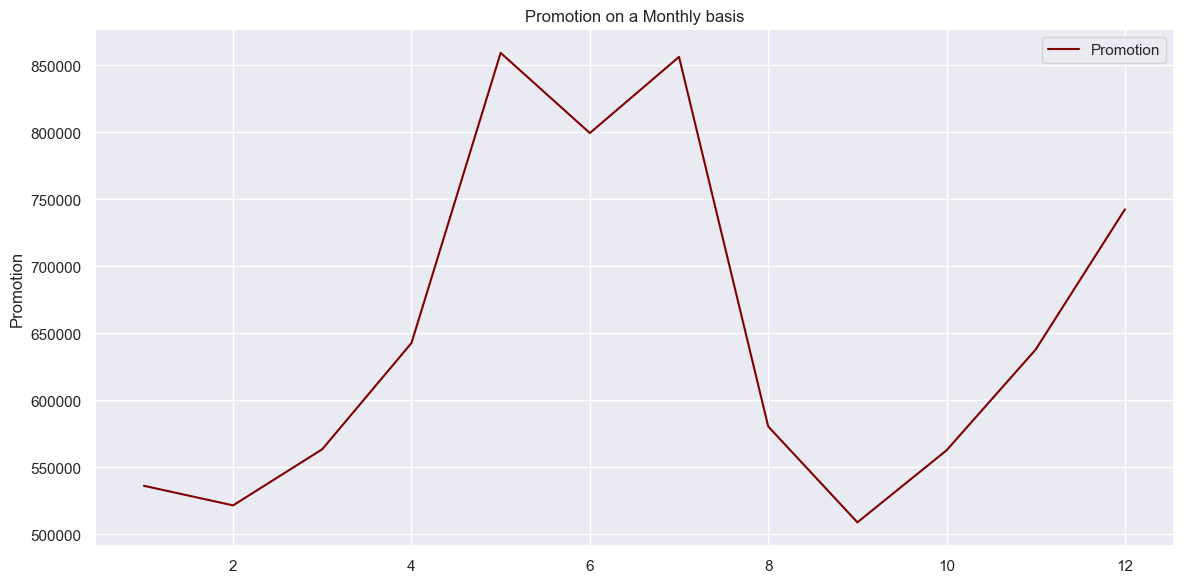

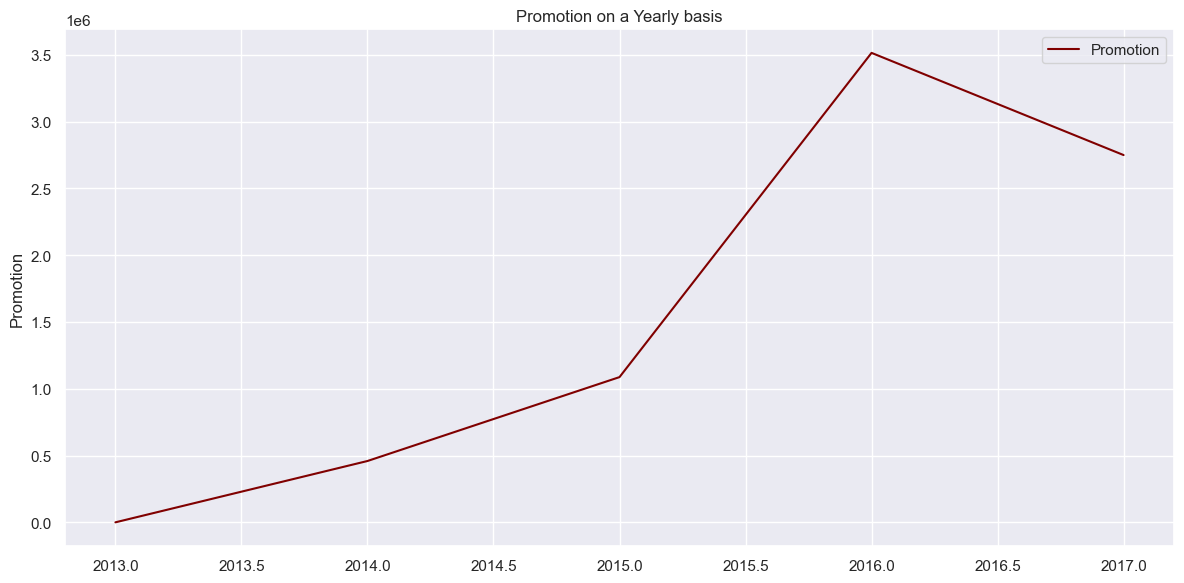

In [260]:
def promo_freq(df, freq):
    plt.figure(figsize=(fig_size))
    plt.plot(df.index, df.values, label='Promotion', color='maroon')
    
    plt.title(f'Promotion on a {freq} basis')
    plt.ylabel('Promotion')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

promo_month = df_train.groupby('month').onpromotion.sum()
promo_year = df_train.groupby('year').onpromotion.sum()

promo_freq(promo_sum, 'Monthly')
promo_freq(promo_year, 'Yearly')

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Family and Sales:
</span> 

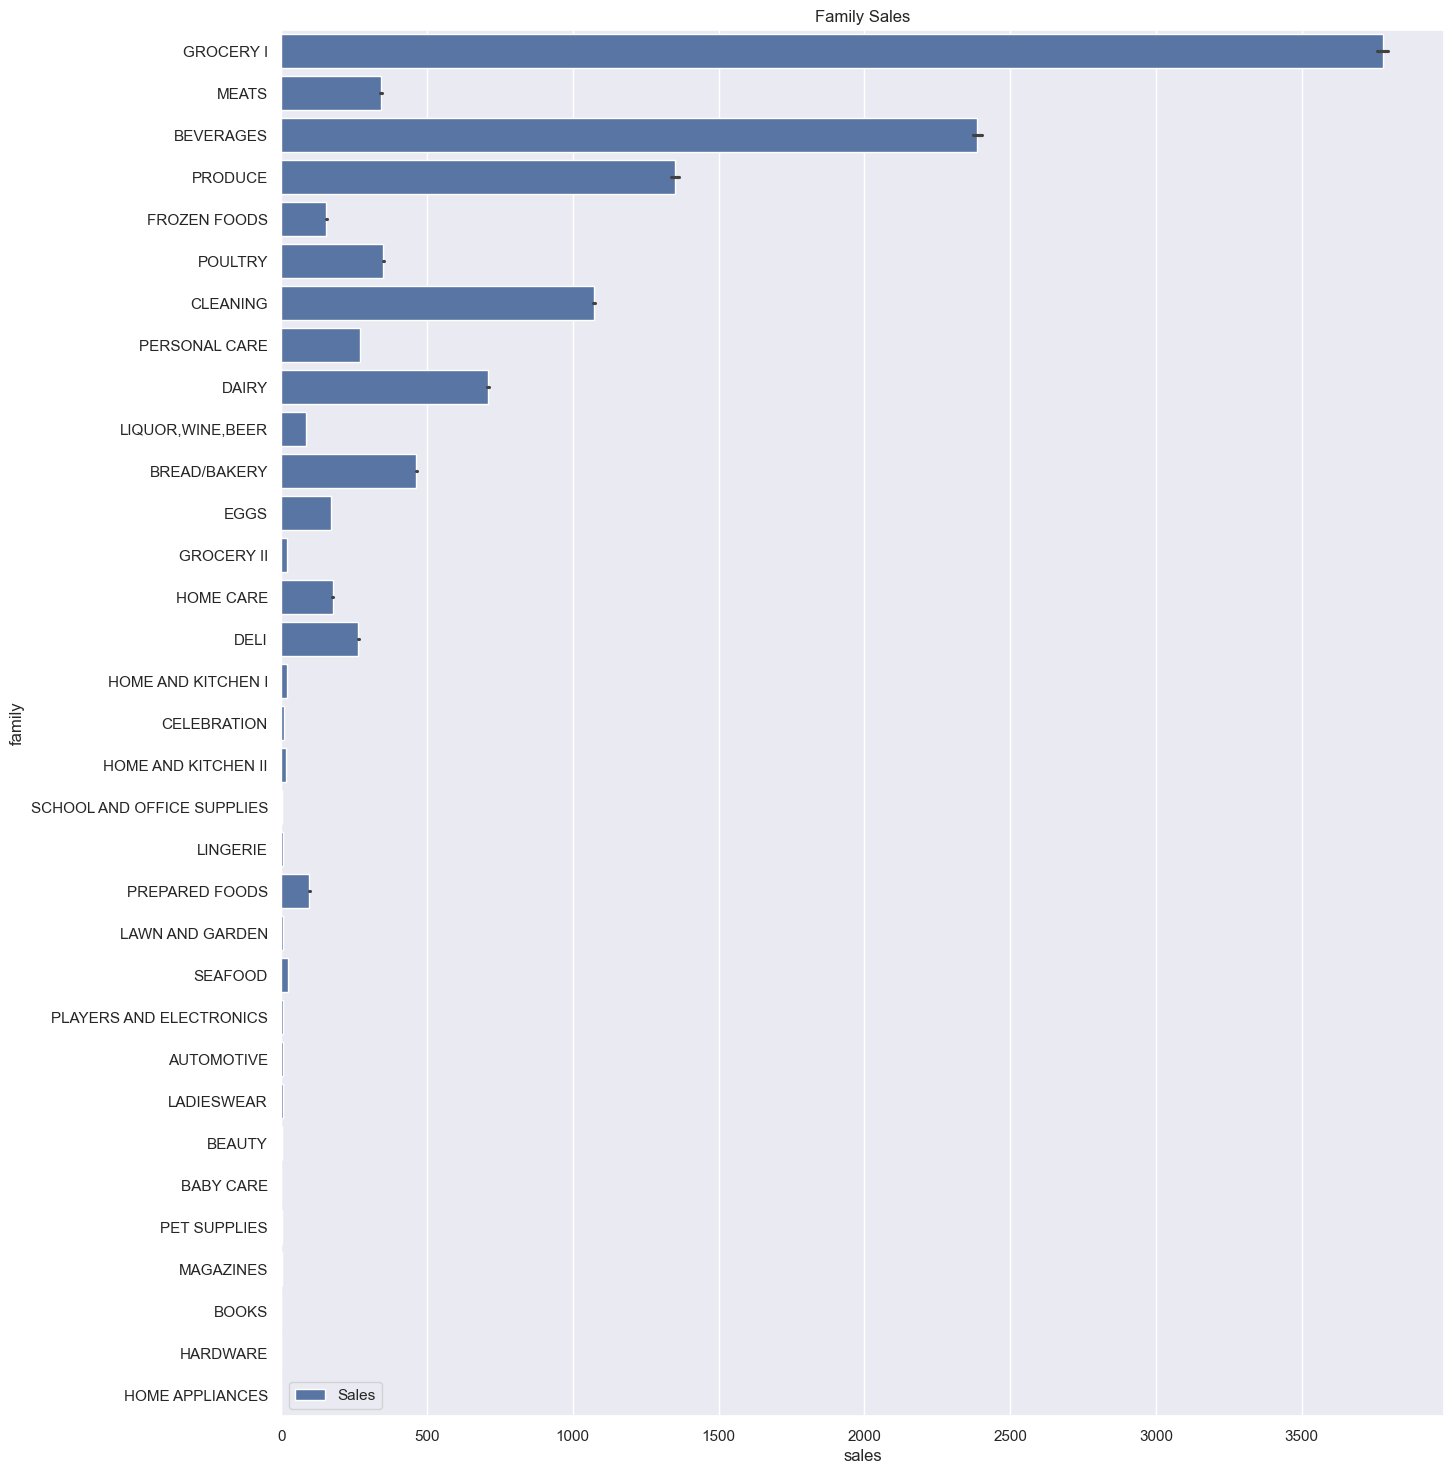

In [261]:
def family_comp(df):
    plt.figure(figsize=(15,18))
    sns.barplot(x="sales", y="family", data=df, label="Sales", color="b")
    plt.legend()
    plt.title('Family Sales')
    plt.show()

family_sort = df_train.sort_values(by=['sales','family'], ascending=False)
family_comp(family_sort)

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Promotion and Sales:
</span> 

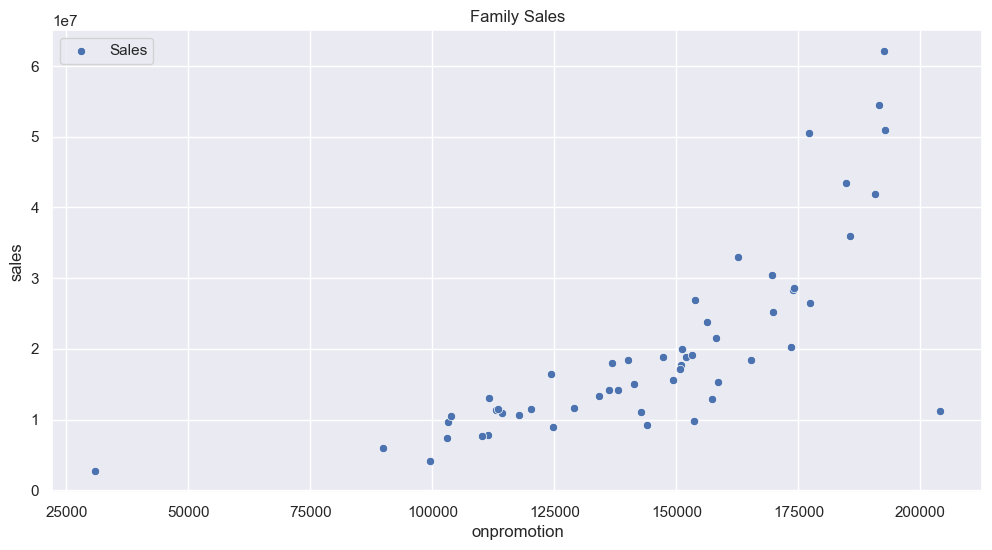

In [262]:
def family_comp(df):
    sns.set(rc={'figure.figsize':fig_size})
    sns.scatterplot(x=df.onpromotion, y=df.sales, label="Sales", color="b")
    plt.legend()
    plt.title('Family Sales')
    plt.show()

promo_sales = df_train.groupby('store_nbr')[['onpromotion','sales']].sum()
family_comp(promo_sales)

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Oil Price Distribution:
</span> 

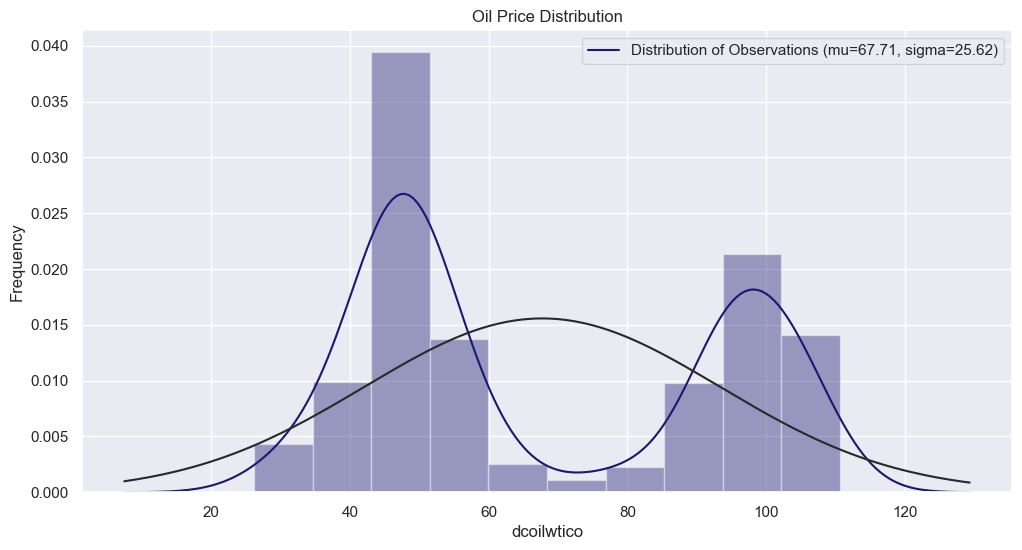

In [263]:
def distplot_feature(target, col):
    sns.set(rc={'figure.figsize':fig_size})        
    sns.distplot(target, fit=norm, color='midnightblue')  
    mu, sigma = norm.fit(target)
    
    plt.legend([f'Distribution of Observations (mu={round(mu,2)}, sigma={round(sigma, 2)})'], loc='upper right')
    plt.ylabel('Frequency')      
    plt.title(f'{col} Distribution', fontsize=12)
    plt.show()

distplot_feature(df_oil.dcoilwtico.dropna(), 'Oil Price')

<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Yearly graph of Oil Sales:
</span> 

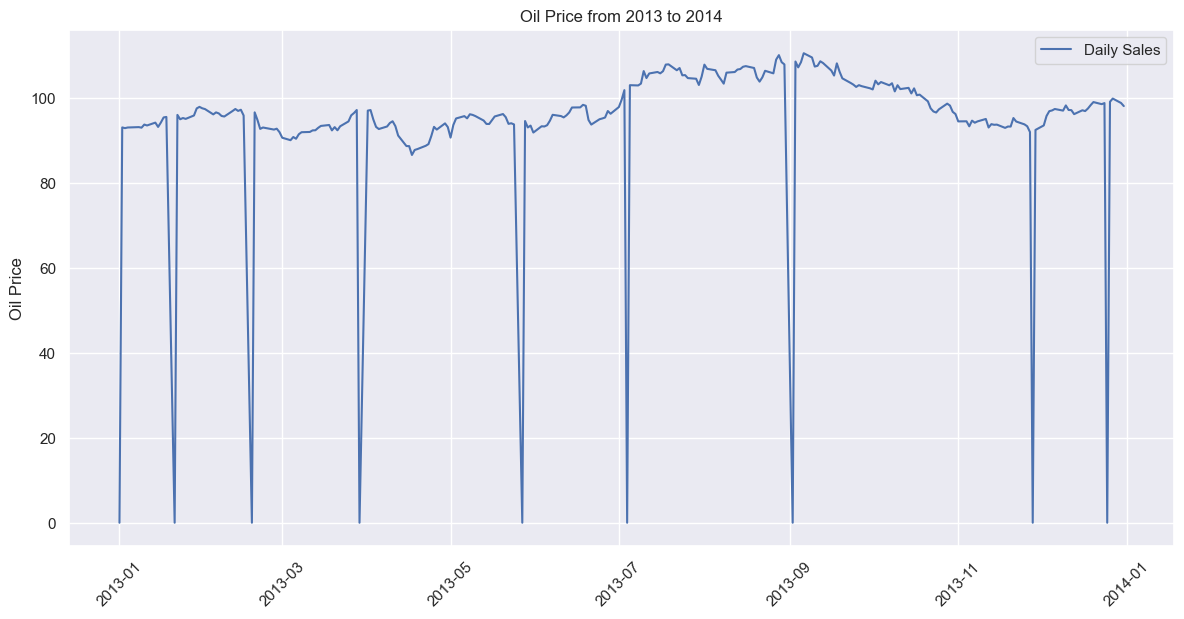

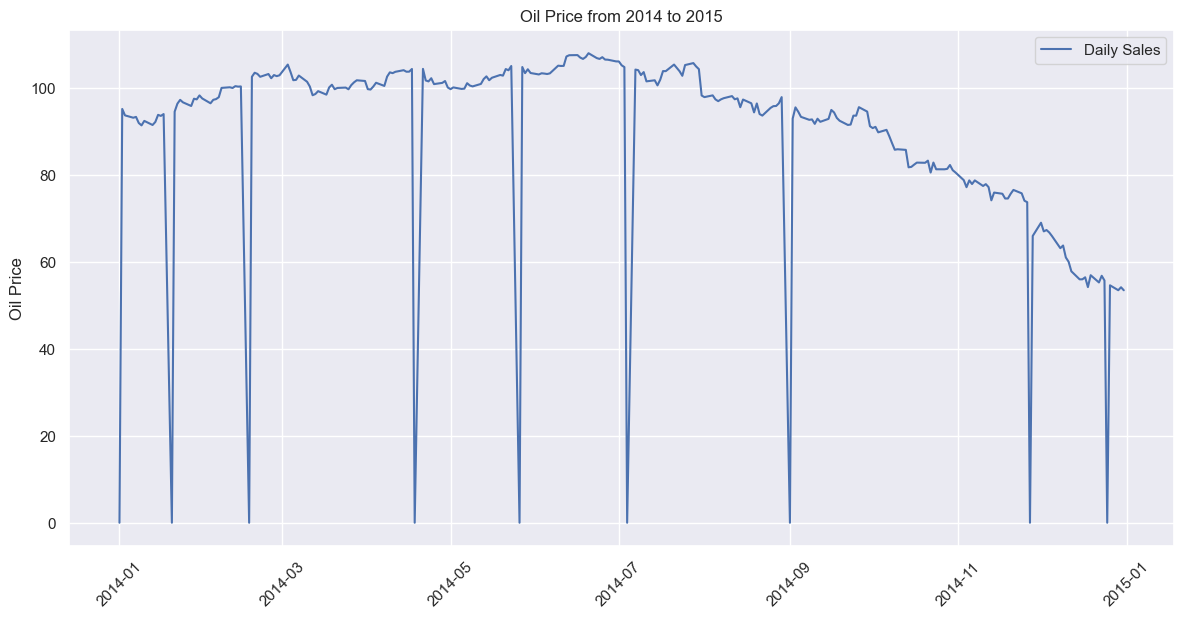

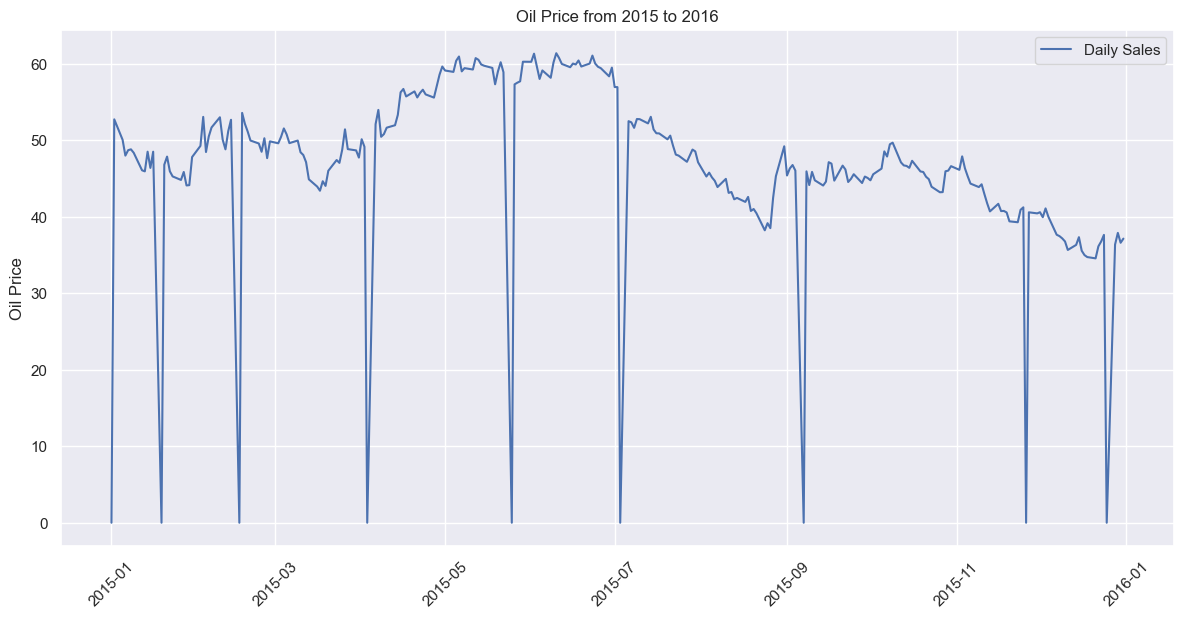

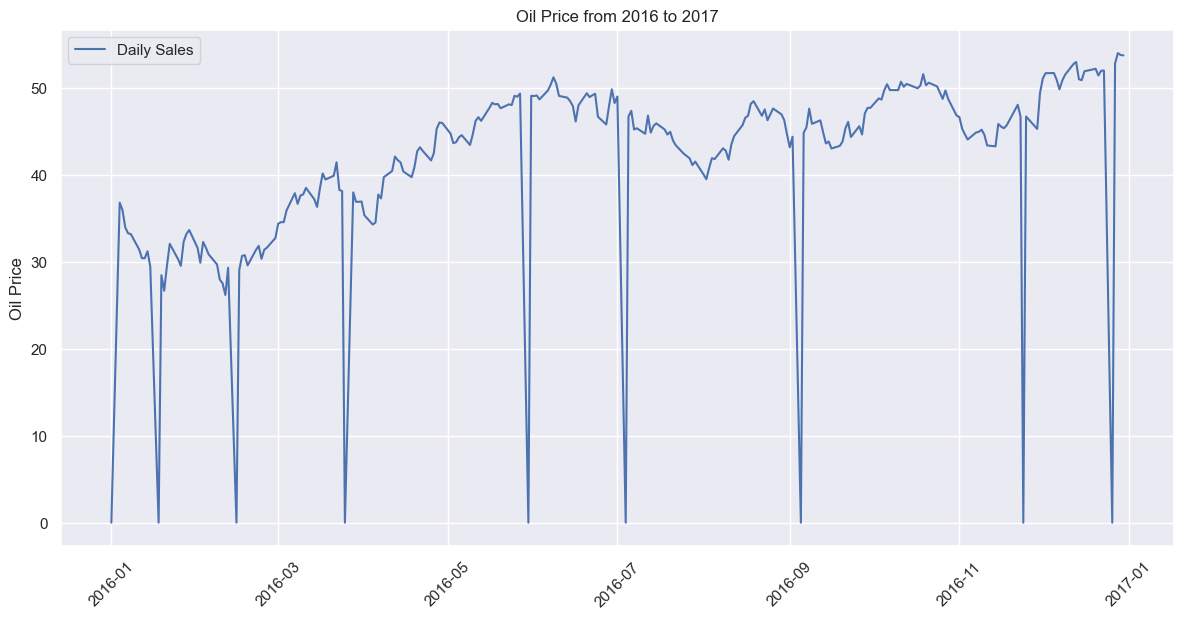

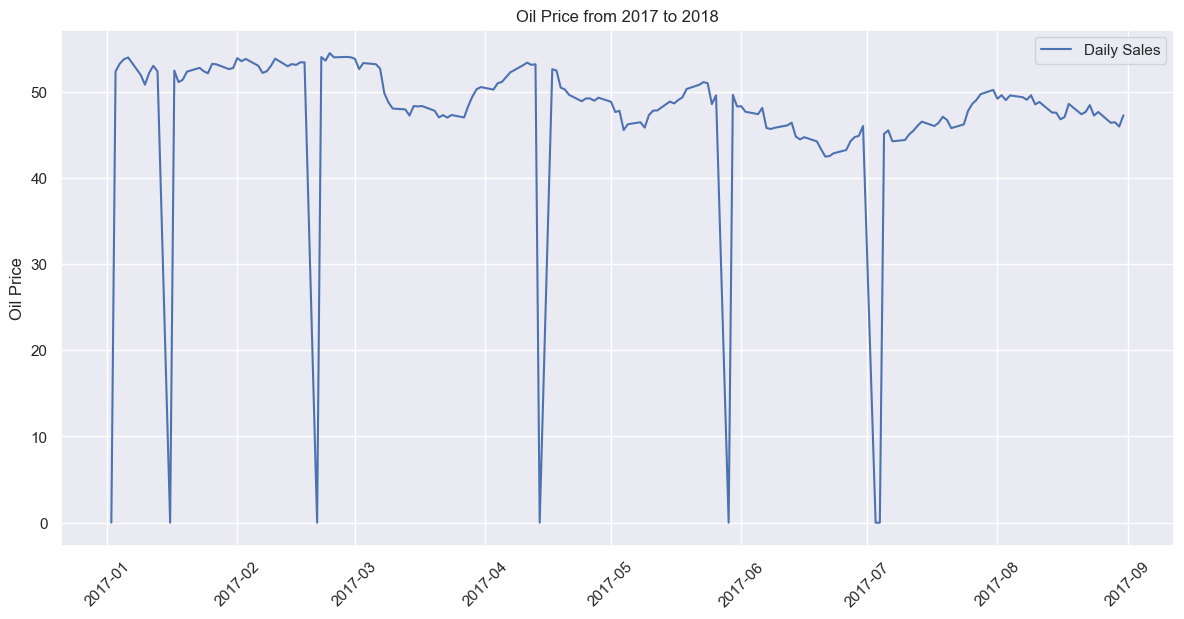

In [264]:
def filter_yearly_graph(df, year_start, year_end):
    plt.figure(figsize=(fig_size))
    plt.plot(df.index, df.values, label='Daily Sales', color='b')
    
    plt.title(f'Oil Price from {year_start} to {year_end}')
    plt.ylabel('Oil Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

timeframe = df_oil.year.unique()
daily_oil_sales = df_oil.groupby('date')['dcoilwtico'].sum()

for year in timeframe:
    mask = (daily_oil_sales.index.year >= year) & (daily_oil_sales.index.year < year+1)
    filtered_daily_sales = daily_oil_sales[mask]    
    
    filter_yearly_graph(filtered_daily_sales, year, year+1)


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Oil Trends:
</span> 

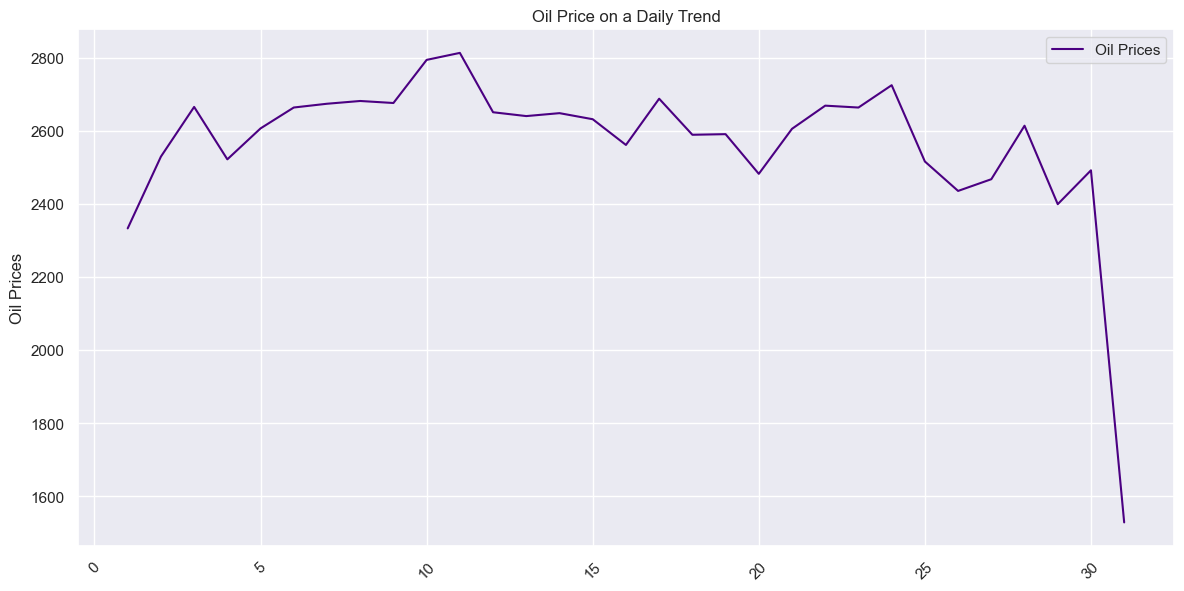

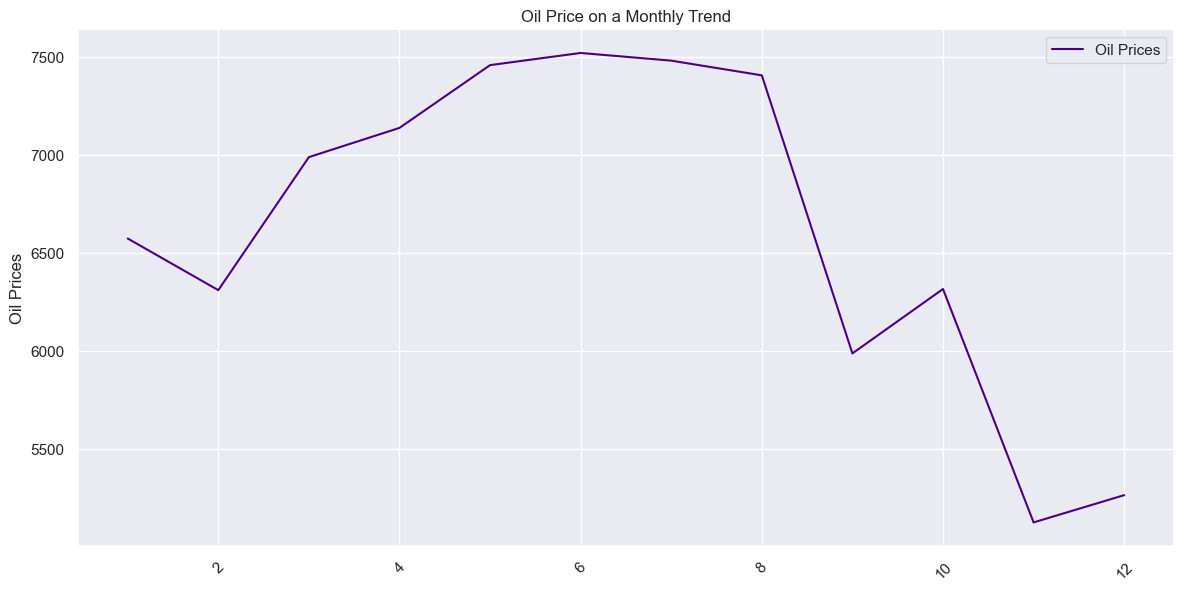

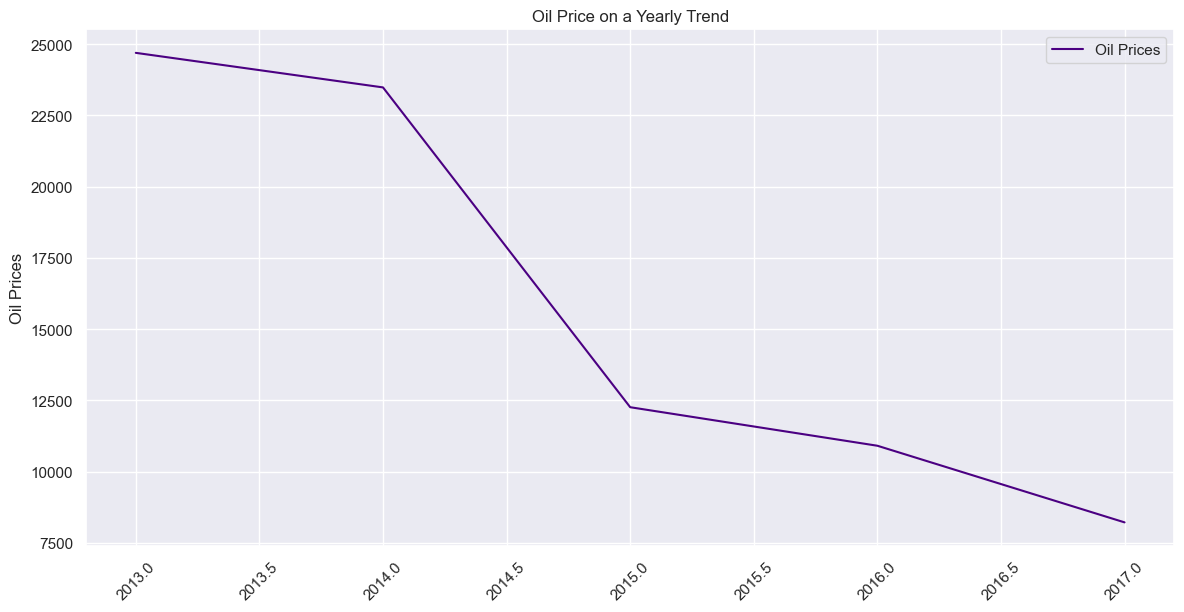

In [265]:
def oil_trend(df, freq):
    plt.figure(figsize=(fig_size))
    plt.plot(df, label='Oil Prices', color='indigo')
    
    plt.title(f'Oil Price on a {freq} Trend')
    plt.ylabel('Oil Prices')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

daily_trend = df_oil.groupby('day')['dcoilwtico'].sum()
monthly_trend = df_oil.groupby('month')['dcoilwtico'].sum()
yearly_trend = df_oil.groupby('year')['dcoilwtico'].sum()

oil_trend(daily_trend, 'Daily')
oil_trend(monthly_trend, 'Monthly')
oil_trend(yearly_trend, 'Yearly')


<span style="font-family:Cambria; color:#0261ab; font-size: 22px; text-shadow: 0.5px 0.5px black"> 
• Distribution of Store:
</span> 

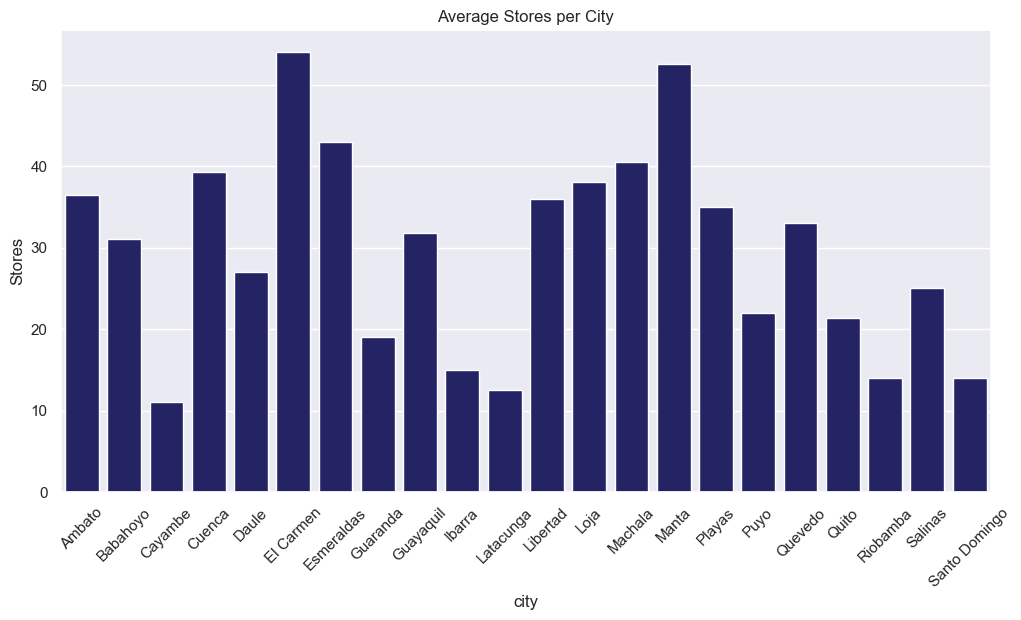

In [266]:
def type_counts(df):
    sns.set(rc={'figure.figsize':fig_size})        
    sns.barplot(df, color='midnightblue')  
    plt.ylabel('Stores')      
    plt.title('Average Stores per City', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

city_stores = df_stores.groupby(['city']).store_nbr.mean()
type_counts(city_stores)